# import packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import collections

# parse file for read depth 


In [2]:
fs=open('/Users/cmdb/qbb2020-answers/Week_2_homework/ann.vcf', 'r')

In [3]:
#create empty list to append later 
read_depths_list=[]
#make for loop to read file in line by line 
for i,line in enumerate(fs): 
    #split by semicolon because we want FORMAT not INFO
    split=line.split(";")
    #split if.....
    for j,fields in enumerate(split):
        #search for DP in the FORMAT 
        if "DP="in fields:
            #split again in case there is a comma separating values 
            if "," in fields:
                #split again by comma, if there is a comma separating values 
                split2=fields.split(",")
                
                for h,split2 in enumerate(split2):
                    if "=" in split2:
                        #index is equals sign 
                        index = split2.index("=")
                        #add to list, anything after the equals sign 
                        read_depths_list.append(int(split2[index+1:]))    
                    else:
                        read_depths_list.append(int(split2[:]))
            else:
                read_depths_list.append(int(fields[3:]))
        else:
            pass 
#print(read_depths_list)
fs.close()

In [4]:
#make into pandas dataframe 
read_depth_df=pd.DataFrame(read_depths_list, columns=["depth"])


# parse file for quality distribution

In [5]:
fs2=open('/Users/cmdb/qbb2020-answers/Week_2_homework/ann.vcf', 'r')

In [6]:
#create empty list to append later 
quality_dist_list=[]
#make for loop to read file in line by line 
for i,line in enumerate(fs2): 
    #split by semicolon because we want FORMAT not INFO
    split=line.split(";")
    #split if.....
    for j,fields in enumerate(split):
        #search for DP in the FORMAT 
        if "QR="in fields:
            #split again in case there is a comma separating values 
            if "," in fields:
                #split again by comma, if there is a comma separating values 
                split2=fields.split(",")
                for h,split2 in enumerate(split2):
                    if "=" in split2:
                        #index is equals sign 
                        index = split2.index("=")
                        #add to list, anything after the equals sign 
                        quality_dist_list.append(split2[index+1:])  
                    else:
                        quality_dist_list.append(split2[:])
                       
            else:
                quality_dist_list.append(fields[3:])
        else:
            pass 
#print(quality_dist_list)
fs2.close()

In [7]:
#remove the terms that are from the PQR field 
for i in quality_dist_list:
    if '=' in i:
        quality_dist_list.remove(i)
        
#print(quality_dist_list)

In [8]:
#make into pandas dataframe 
quality_df=pd.DataFrame(quality_dist_list, columns=["quality"])


# parse file for allele frequency

In [9]:
fs3=open('/Users/cmdb/qbb2020-answers/Week_2_homework/ann.vcf', 'r')

In [10]:
#create empty list to append later 
allele_freq_list=[]
#make for loop to read file in line by line 
for i,line in enumerate(fs3): 
    #split by semicolon because we want FORMAT not INFO
    split=line.split(";")
    #split if.....
    for j,fields in enumerate(split):
        #search for DP in the FORMAT 
        if "AF="in fields:
            #split again in case there is a comma separating values 
            if "," in fields:
                #split again by comma, if there is a comma separating values 
                split2=fields.split(",")
                for h,split2 in enumerate(split2):
                    if "=" in split2:
                        #index is equals sign 
                        index = split2.index("=")
                        #add to list, anything after the equals sign 
                        allele_freq_list.append(split2[index+1:])   
                    else:
                        allele_freq_list.append(split2[:])
            else:
                allele_freq_list.append(fields[3:])
        else:
            pass 
#print(allele_freq_list)
fs3.close()

In [11]:
#remove the terms that are from the SAF field
for i in allele_freq_list:
    if '=' in i:
        allele_freq_list.remove(i)
        
#print(allele_freq_list)

In [12]:
#make into pandas dataframe 
allelefreq_df=pd.DataFrame(allele_freq_list, columns=["Freq"])


# parse for predicted effects 

In [13]:
fs4=open('/Users/cmdb/qbb2020-answers/Week_2_homework/ann.vcf', 'r')

In [14]:
#create empty list to append later 
predicted_effects_list=[]
#make for loop to read file in line by line 
for i,line in enumerate(fs4): 
    #split by semicolon because we want FORMAT not INFO
    split=line.split(";")
    #split if.....
    for j,fields in enumerate(split):
        #search for DP in the FORMAT 
        if "ANN="in fields:
            #split again in case there is a pipe separating values 
            #if "|" in fields:
            #if "upstream_gene_variant" in fields:
            split2=fields.split("|")
            predicted_effects_list.append(split2[1:])
        else:
            pass 
print(predicted_effects_list[100])

fs4.close()

['synonymous_variant', 'LOW', 'BDH2', 'YAL061W', 'transcript', 'YAL061W', 'protein_coding', '1/1', 'c.723T>A', 'p.Thr241Thr', '723/1254', '723/1254', '241/417', '', ',A', 'upstream_gene_variant', 'MODIFIER', 'BDH1', 'YAL060W', 'transcript', 'YAL060W', 'protein_coding', '', 'c.-985T>A', '', '', '', '', '985', ',A', 'upstream_gene_variant', 'MODIFIER', 'ECM1', 'YAL059W', 'transcript', 'YAL059W', 'protein_coding', '', 'c.-2339T>A', '', '', '', '', '2339', ',A', 'upstream_gene_variant', 'MODIFIER', 'CNE1', 'YAL058W', 'transcript', 'YAL058W', 'protein_coding', '', 'c.-3294T>A', '', '', '', '', '3294', ',A', 'downstream_gene_variant', 'MODIFIER', 'GDH3', 'YAL062W', 'transcript', 'YAL062W', 'protein_coding', '', 'c.*1230T>A', '', '', '', '', '1230', ',A', 'downstream_gene_variant', 'MODIFIER', 'YAL059C-A', 'YAL059C-A', 'transcript', 'YAL059C-A', 'protein_coding', '', 'c.*2326A>T', '', '', '', '', '2326', ',A', 'downstream_gene_variant', 'MODIFIER', 'YAL056C-A', 'YAL056C-A', 'transcript', 'YAL

In [15]:
#get the first term for each list inside of the list 
predicted_effects_pulled_list=[item[0] for item in predicted_effects_list]
#print(predicted_effects_pulled_list)


In [16]:
#count each occurance of effect 

occurrences = collections.Counter(predicted_effects_pulled_list)
#print(occurrences)

occurrence_dict=dict(occurrences)
print(occurrence_dict)
#occurrence_dict
key=list(occurrence_dict.keys())
value=list(occurrence_dict.values())
occurrences_df=pd.DataFrame(occurrence_dict, columns=["Effect", "count"])
#occurrences_df

{'upstream_gene_variant': 16318, 'synonymous_variant': 15605, 'missense_variant': 9369, 'stop_gained': 75, 'splice_region_variant&intron_variant': 11, 'stop_lost&splice_region_variant': 17, 'frameshift_variant': 151, 'frameshift_variant&stop_lost&splice_region_variant': 3, 'disruptive_inframe_deletion': 21, 'downstream_gene_variant': 226, 'disruptive_inframe_insertion': 9, 'conservative_inframe_insertion': 9, 'stop_lost': 12, 'splice_region_variant&stop_retained_variant': 26, 'stop_retained_variant': 2, 'initiator_codon_variant': 1, 'start_lost': 18, 'conservative_inframe_deletion': 6, 'splice_region_variant&non_coding_transcript_exon_variant': 1, '': 677, 'frameshift_variant&start_lost': 4, 'splice_donor_variant&intron_variant': 1, 'frameshift_variant&splice_region_variant': 1, 'splice_acceptor_variant&intron_variant': 1, 'splice_region_variant&synonymous_variant': 2, 'start_lost&conservative_inframe_insertion': 1, 'missense_variant&splice_region_variant': 1, 'frameshift_variant&stop_

# make graph with subplots

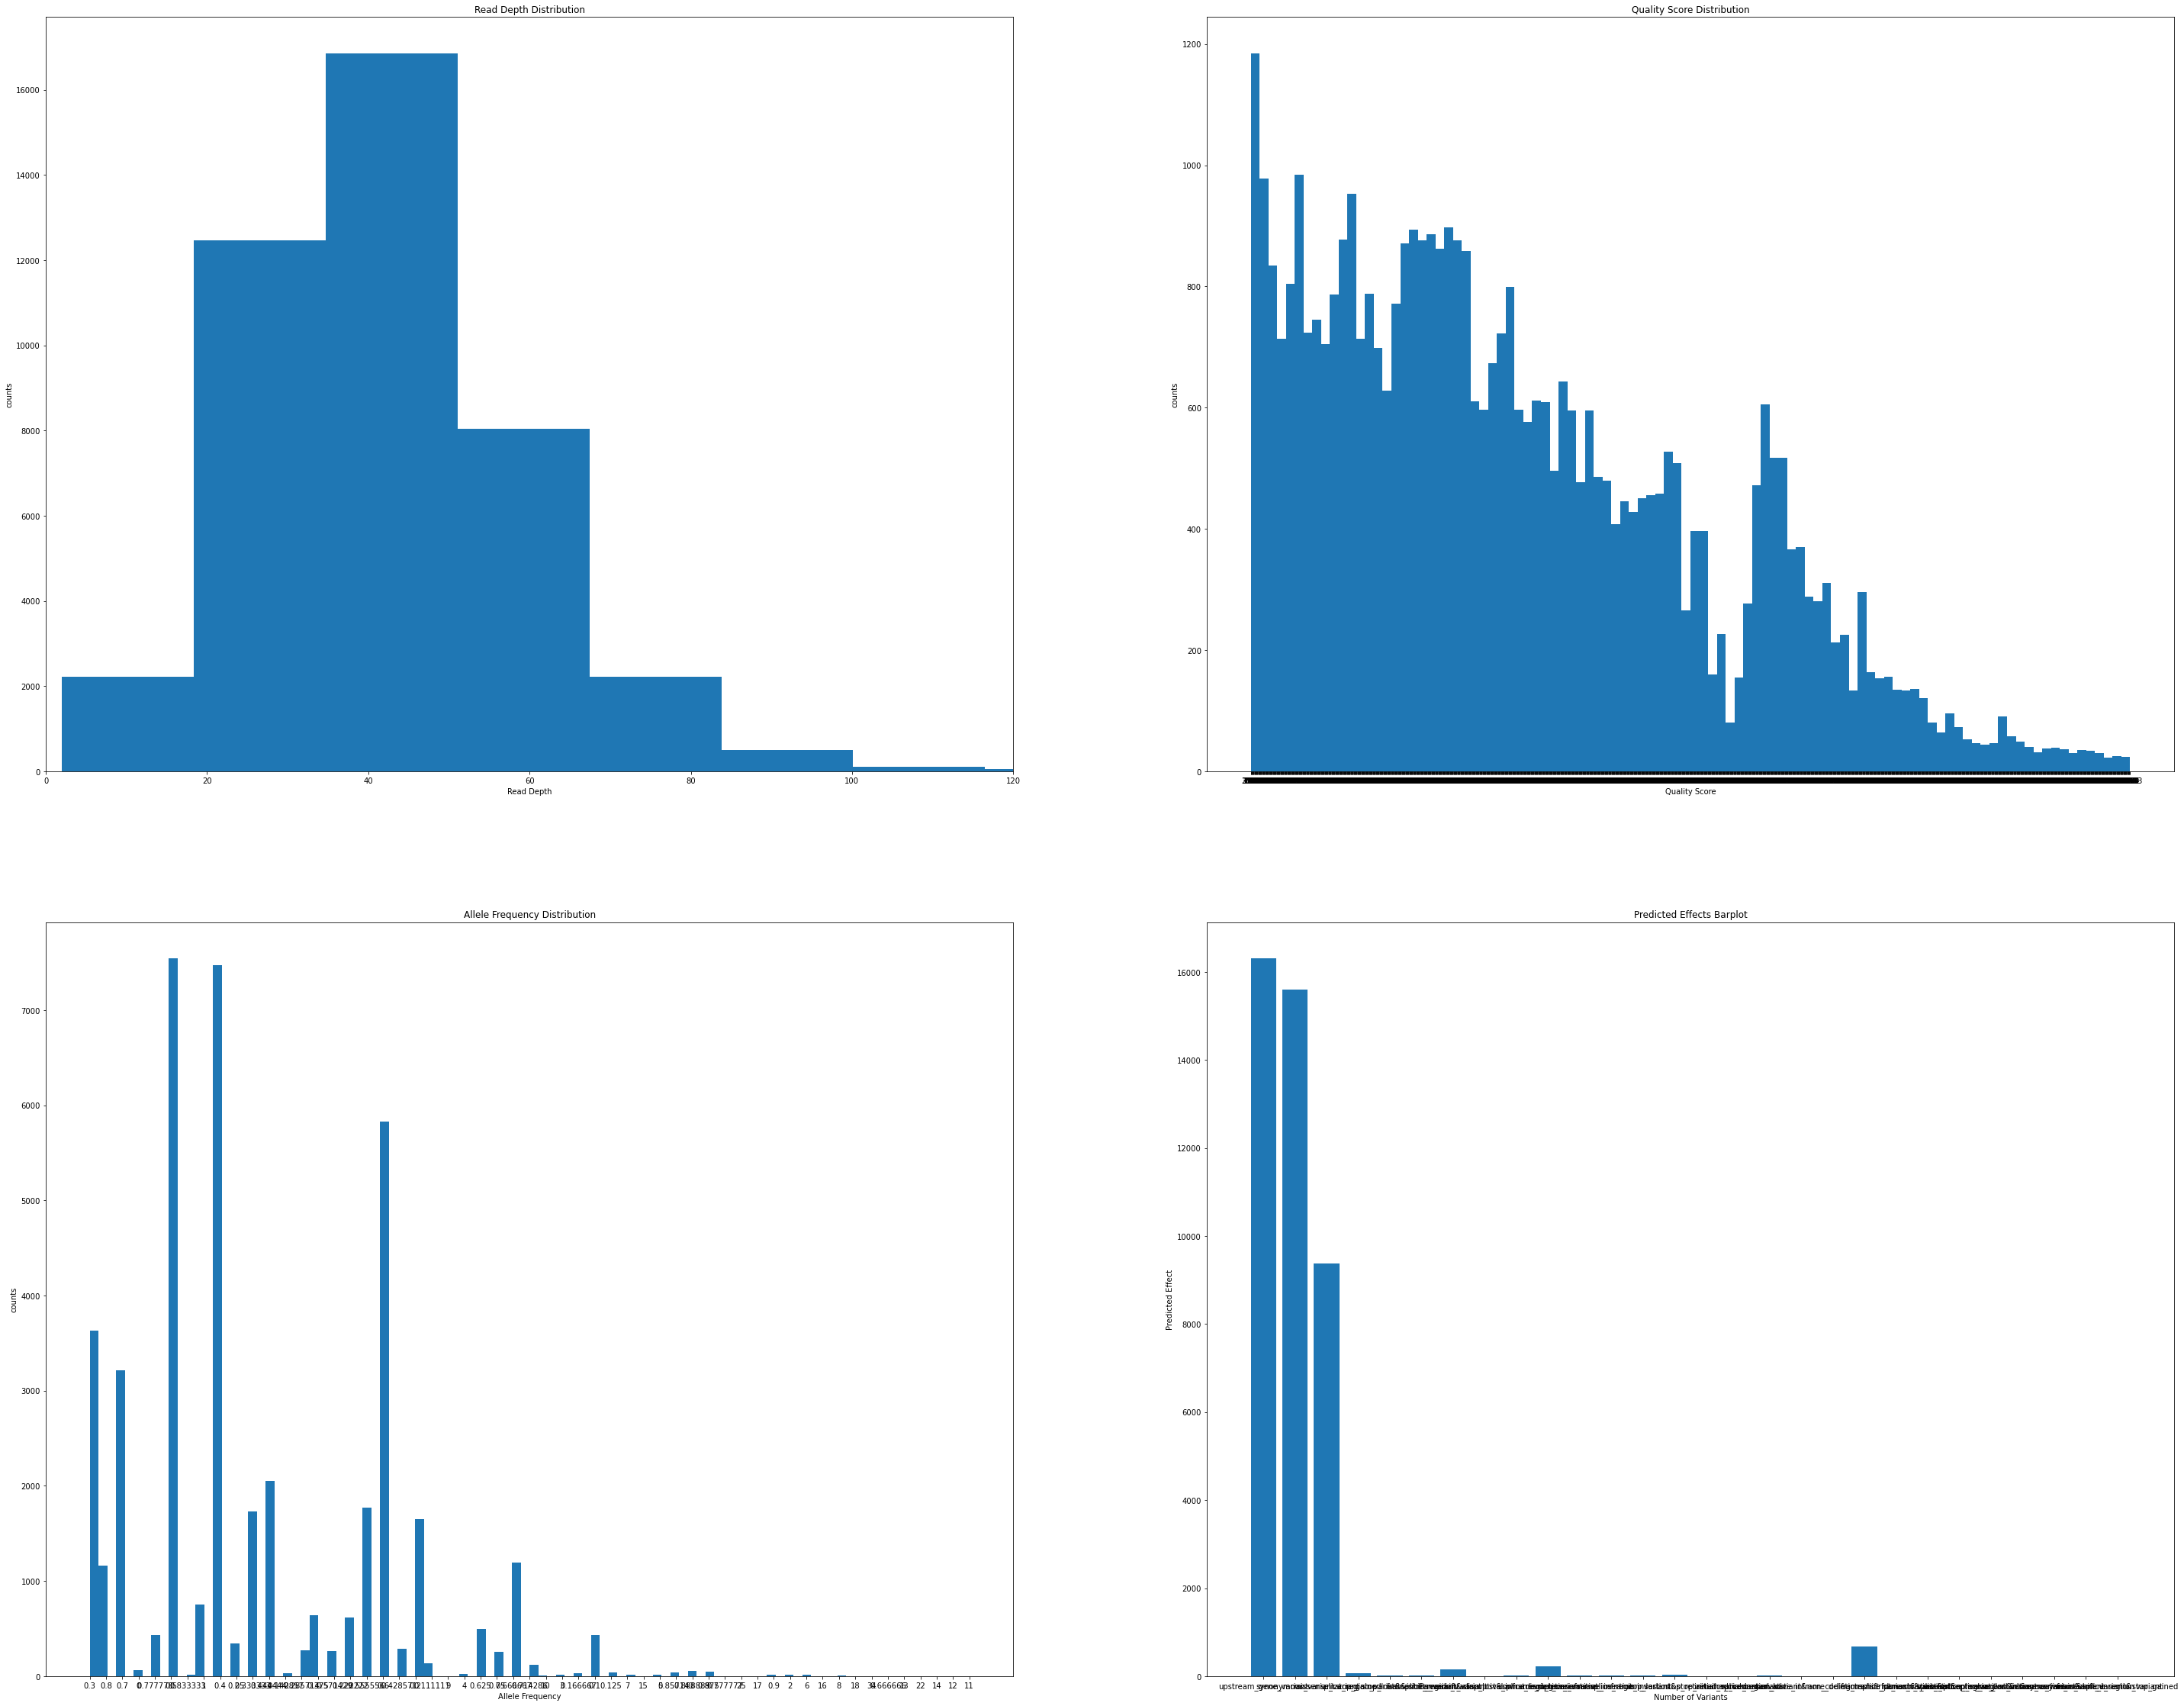

In [30]:
fig, ax = plt.subplots(2,2, figsize=(50,40))

ax[0,0].hist(read_depth_df['depth'],bins=300)
ax[0,0].set_xlabel('Read Depth')
ax[0,0].set_ylabel('counts')
ax[0,0].title.set_text('Read Depth Distribution')
ax[0,0].set_xlim(0,120)


ax[0,1].hist(quality_df['quality'], bins=100)
ax[0,1].set_xlabel('Quality Score')
ax[0,1].set_ylabel('counts')
ax[0,1].title.set_text('Quality Score Distribution')


ax[1,0].hist(allelefreq_df['Freq'], bins=100)
ax[1,0].set_xlabel('Allele Frequency')
ax[1,0].set_ylabel('counts')
ax[1,0].title.set_text('Allele Frequency Distribution')

ax[1,1].bar(key,value)
ax[1,1].set_xlabel('Number of Variants')
ax[1,1].set_ylabel('Predicted Effect')
ax[1,1].title.set_text('Predicted Effects Barplot')
#ax[1,1].set_xticklabels(labels=key, rotation=45)

fig.tight_layout
plt.show()